HW #4 Machine learning - clustering

 Mojtaba Aprouz - 40030594

Part A

In [202]:
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt

In [203]:
#loading dataset
file=np.loadtxt('file.txt')
X=file[:,:-1]

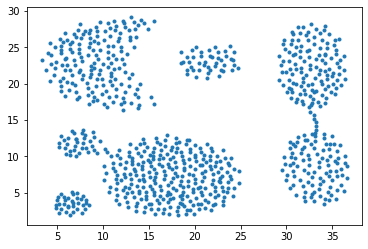

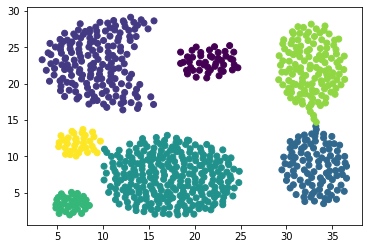

In [204]:
plt.plot(file[:,0],file[:,1],'.')
plt.show()
plt.scatter(file[:,0],file[:,1],c=file[:,-1])
plt.show()

In [205]:
def represent(clusters,k):
    """ Representation the clusters to appropriate form for scoring and ploting
    output: cluster"""
    cluster=np.empty((1,3))
    for i in range(k):
       c0=clusters [i]
       c0=np.array(c0)
       c1=np.array([[i]]*c0.shape[0])
       c0=np.append(c0,c1,axis=1)
       cluster=np.append(cluster,c0,axis=0)
    cluster=cluster[1:,:]
    return cluster

Part A - 1

In [206]:
def clusters_func(X, centroids, k):
    """ Its for recalculates the clusters
    output: clusters , cost """
    # Initiate empty clusters
    cost=np.zeros(k)
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    for data in X:
        dist = []
        for j in range(k):
            dist.append((np.linalg.norm(data - centroids[j]))**2)
        # Append the cluster of data to the dictionary
        minimum=min(dist)
        index=dist.index(minimum)
        clusters[index].append(data)
        #Add the minimum distance from sample to centroid to the cost
        cost[index]= cost[index]+minimum
    #sum of all clusters as total cost of each k
    cost=sum(cost) 
    return clusters,cost
def centroids_func(centroids, clusters, k):
    """ Its for recalculates the centroid 
    output: centroids """
    for i in range(k):
        #Set the average of the clusters as centroid
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

In [225]:
#initialization 
m_iter=50
costs=np.zeros(m_iter)
k=[1,2,3,4,5,6,7,8,9,10]
total_costs=np.zeros(10)
score=np.zeros(10)
total_clusters=[]
axis=np.zeros(m_iter)
for i in range(m_iter):
   axis[i]=i

Part A - 2 , 3 , 4

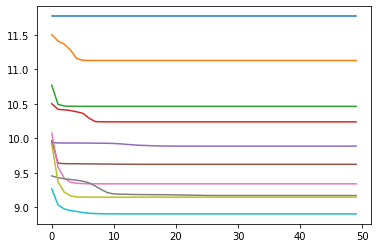

In [226]:
for j in k:
    clusters = {}    #Set the empty clusters
    for i in range(j):
       clusters[i] = []
    centroids={}
    for i in range(j):
       centroids[i] = X[np.random.randint(0,X.shape[0])]   #initial random centroids
   
    for data in X:
        dist = []
        for v in range(j):
            dist.append(np.linalg.norm(data - centroids[v])**2)
        #Set the clusters to random centroids
        clusters[dist.index(min(dist))].append(data)

    

    for i in range(m_iter):
       #clustering and setting centroids
       centroids= centroids_func(centroids, clusters, j)
       clusters,costs[i]=clusters_func(X,centroids, j)
    
    total_clusters.append(clusters)
    rep_clus=represent(clusters,j)
    #calculating scores
    score[j-1]=(adjusted_rand_score(file[:,-1],rep_clus[:,-1]))

    total_costs[j-1]=(min(costs))
    #plot costs by iterates
    
    plt.plot(axis,np.log(costs))

Part A - 5

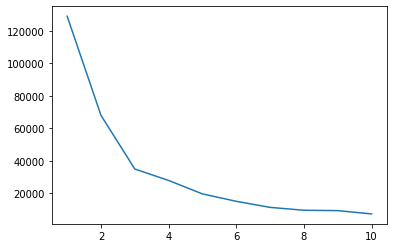

In [227]:
#plot minimum cost of each k value by k
plt.plot(k,total_costs);

Part A - 6

scores: [0.         0.2068438  0.35582    0.48720727 0.30463792 0.48039194
 0.38128709 0.6409887  0.44354042 0.39907131]

best score of different k: [ 8  4  6  9 10]


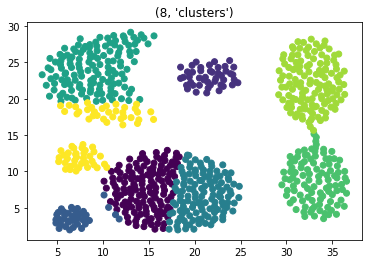

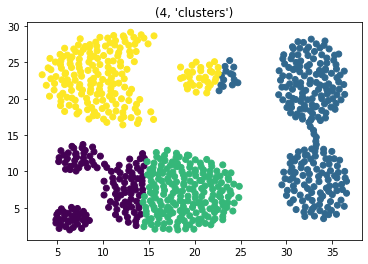

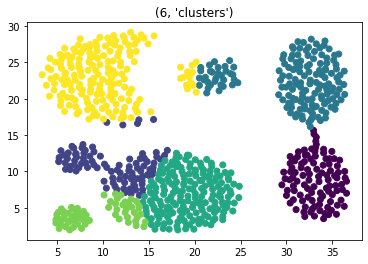

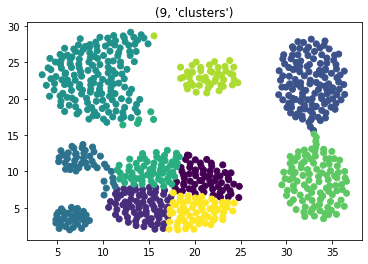

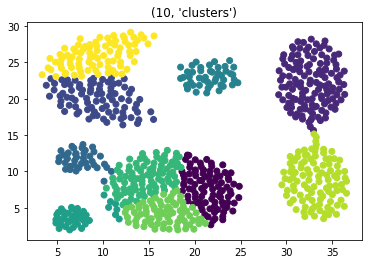

In [228]:
# 5 Best clustering 
idx = score.argsort()[:4:-1]
print('scores:',score)
print('\nbest score of different k:',idx+1)
#display best k clusterings
for i in idx:
   plt.title((i+1, 'clusters' ))                                 
   rep_clus=represent(total_clusters[i],i+1)
   plt.scatter(rep_clus[:,0],rep_clus[:,1],c=rep_clus[:,-1])
   plt.show()

++++++++++++

Part B

In [211]:
from sklearn.cluster import DBSCAN
from matplotlib import cm

In [229]:
def cost_func(model,data):
       """Calculate mean squar error as cost function
       output : cost"""
       dt={}
       centroids={}
       n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)#number of clusters
       for i in range(n_clusters_):
              dt[i] = []
       for i in range(len(data)):      
              if (0<=model.labels_[i]):
                  dt[model.labels_[i]].append(data[i])   
       for i in range(n_clusters_):
              #Set the average of the clusters as centroid
              centroids[i] = np.mean(dt[i], axis=0)


       n_noise = list(model.labels_).count(-1)
       clustered_samples=len(X)-n_noise
       cost =0
       if clustered_samples!=0:
          for i in range(n_clusters_):
              for data in dt[i]:
                 cost=cost+(np.linalg.norm(data - centroids[i])**2)  # MSE
          cost=cost/clustered_samples  #divide by clustered samples

       return cost;

Part B - 1

In [230]:
#initialization hyper parameters
minPts=np.arange(5,15,1)
epsilon=np.arange(1,2,0.1)
print(minPts)
print(epsilon)

[ 5  6  7  8  9 10 11 12 13 14]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


Part B - 2

In [231]:
cost_t=np.zeros((100,3))
score=np.zeros(100)
counter=0
for i in epsilon:
    for j in minPts:
        model=DBSCAN(eps=i,min_samples=j).fit(X)                       #clustering
        score[counter]=(adjusted_rand_score(file[:,-1],model.labels_)) #scoring
        cost_t[counter]=([i,j,cost_func(model,X)])                     #MSE
        counter=counter+1;

Part B - 3

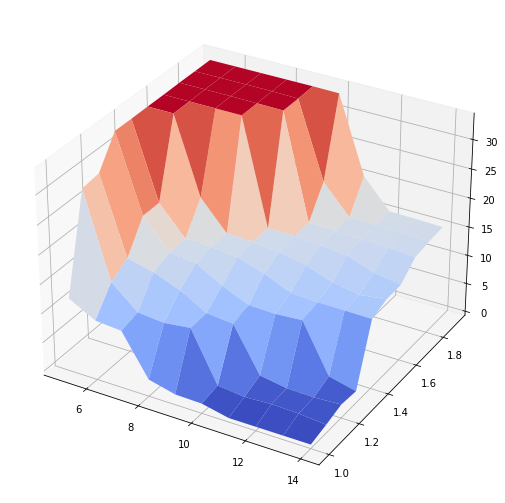

In [235]:
#display 3d plot minPTS * epsilon * MSE
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
V=cost_t[:,1].reshape(10,10)
U=cost_t[:,0].reshape(10,10)
B=cost_t[:,2].reshape(10,10)
ax.plot_surface(V, U, B,cmap=cm.coolwarm)
plt.show()


Part B - 4

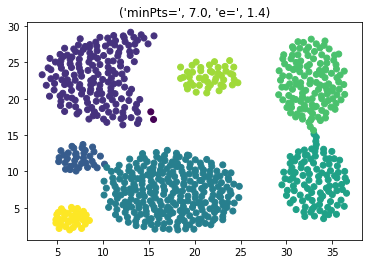

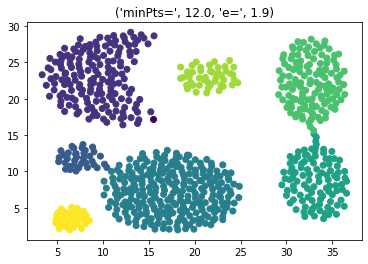

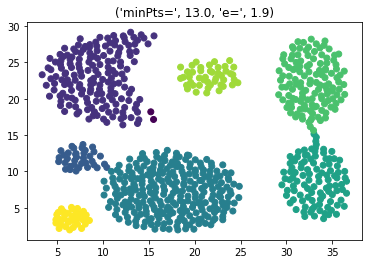

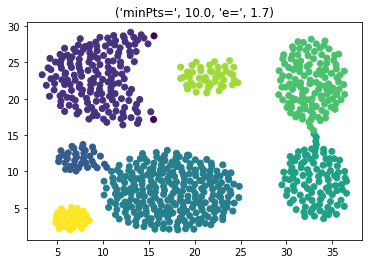

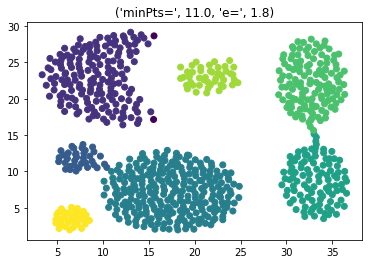

In [234]:
#ploting 5 best clusters
idx = score.argsort()[:-6:-1]
for i in idx:
    model=DBSCAN(eps=cost_t[i,0],min_samples=cost_t[i,1]).fit(X)
    plt.title(('minPts=',cost_t[i,1], 'e=', np.round(cost_t[i,0],2)))                                 
    plt.scatter(X[:,0],X[:,1],c=model.labels_)
    plt.show()